## Capstone Project - Vehicle Loan Default Prediction
### Pravat Kumar Sahu
#### Simplilearn - PGP DA FEB 2021 Cohort 1

In [1]:
import pandas as pd
import numpy as np
import os
import re
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression

In [2]:
#Load the data using pandas.
importdata = pd.read_excel('/Users/priya/Pravat/Simplilearn Data Analytics/Class 5/project/project 2/data.xlsx')
importdata

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,561031,57759,76350,77.28,5,22289,51,3326,1981-11-10,Self employed,...,0,0,0,0,0,0,2yrs 4mon,2yrs 4mon,0,0
233150,649600,55009,71200,78.72,138,17408,51,3385,1992-10-15,Self employed,...,0,0,15209,0,0,0,1yrs 5mon,1yrs 5mon,1,0
233151,603445,58513,68000,88.24,135,23313,45,1797,1981-12-19,Self employed,...,0,0,257948,0,35,5,0yrs 9mon,3yrs 10mon,1,0
233152,442948,22824,40458,61.79,160,16212,48,96,1989-07-31,Self employed,...,0,0,26046,0,9,1,1yrs 2mon,3yrs 2mon,0,0


In [3]:
loandata = importdata

### 1. Preliminary Data analysis

In [4]:
#find the structure of the data
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   Employment.Type                      225493 non-null  object        
 

In [5]:
loandata.head(5)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [6]:
loandata.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [7]:
#Check for null values in the data. Get the number of null values for each column.
loandata.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [8]:
#Missing values found in Employement type column only. As it is catagorial data, fill the missing values with Mode value using pandas. 
loandata['Employment.Type'].fillna(loandata['Employment.Type'].mode()[0], inplace=True)

In [9]:
#verify after fill NA.
loandata.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [10]:
#Now let's check number of rows and coloumns in dataframe
loandata.shape

(233154, 41)

In [11]:
#Let's check the if any duplicates in dataframe
loandata.duplicated().any()

False

In [12]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   Employment.Type                      233154 non-null  object        
 

In [13]:
#Variable names in the data may not be in accordance with the identifier naming in Python, so let's change the variable names accordingly.

In [14]:
loandata = loandata.rename(columns={"Date.of.Birth":"Date_of_Birth",
                                     "Employment.Type":"Employment_Type",
                                     "PERFORM_CNS.SCORE":"PERFORM_CNS_SCORE",
                                     "PERFORM_CNS.SCORE.DESCRIPTION":"PERFORM_CNS_SCORE_DESCRIPTION",
                                     "PRI.NO.OF.ACCTS":"PRI_NO_OF_ACCTS",
                                     "PRI.ACTIVE.ACCTS":"PRI_ACTIVE_ACCTS",
                                     "PRI.OVERDUE.ACCTS":"PRI_OVERDUE_ACCTS",
                                     "PRI.CURRENT.BALANCE":"PRI_CURRENT_BALANCE",
                                     "PRI.SANCTIONED.AMOUNT":"PRI_SANCTIONED_AMOUNT",
                                     "PRI.DISBURSED.AMOUNT":"PRI_DISBURSED_AMOUNT",
                                     "SEC.NO.OF.ACCTS":"SEC_NO_OF_ACCTS",
                                     "SEC.ACTIVE.ACCTS":"SEC_ACTIVE_ACCTS",
                                     "SEC.OVERDUE.ACCTS":"SEC_OVERDUE_ACCTS",
                                     "SEC.CURRENT.BALANCE":"SEC_CURRENT_BALANCE",
                                     "SEC.SANCTIONED.AMOUNT":"SEC_SANCTIONED_AMOUNT",
                                     "SEC.DISBURSED.AMOUNT":"SEC_DISBURSED_AMOUNT",
                                     "PRIMARY.INSTAL.AMT":"PRIMARY_INSTAL_AMT",
                                     "SEC.INSTAL.AMT":"SEC_INSTAL_AMT",
                                     "NEW.ACCTS.IN.LAST.SIX.MONTHS":"NEW_ACCTS_IN_LAST_SIX_MONTHS",
                                     "DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS":"DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS",
                                     "AVERAGE.ACCT.AGE":"AVERAGE_ACCT_AGE",
                                     "CREDIT.HISTORY.LENGTH":"CREDIT_HISTORY_LENGTH",
                                     "NO.OF_INQUIRIES":"NO_OF_INQUIRIES"})

In [15]:
#Verify the Variable names after rename
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date_of_Birth                        233154 non-null  datetime64[ns]
 9   Employment_Type                      233154 non-null  object        
 

### 2. Performing EDA

In [16]:
#Check the statistical description of the quantitative data variables
loandata.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [17]:
#How is the target variable distributed overall?

0    182543
1     50611
Name: loan_default, dtype: int64


Text(0.5, 1.0, 'Default Count')

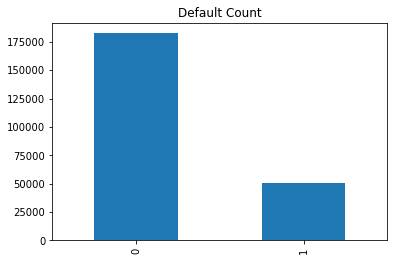

In [18]:
print(loandata.loan_default.value_counts())
loandata.loan_default.value_counts().plot.bar()
plt.title('Default Count')

In [19]:
#Study the distribution of the target variable across the various categories such as branch, city, state, branch, supplier, manufacturer, etc. 

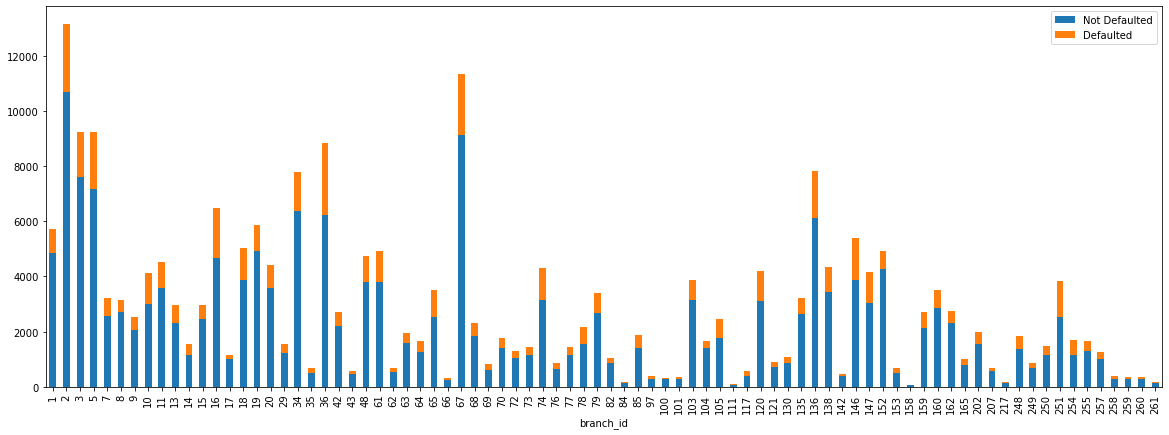

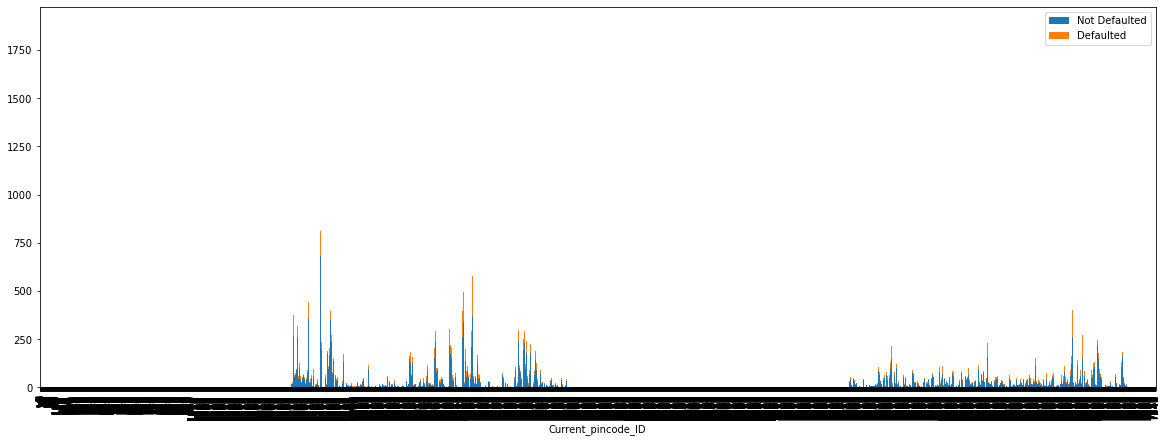

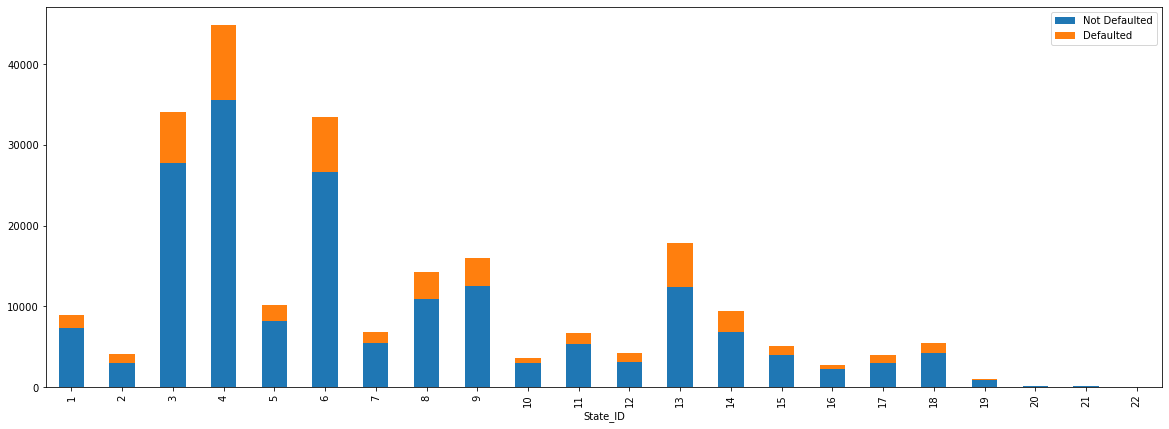

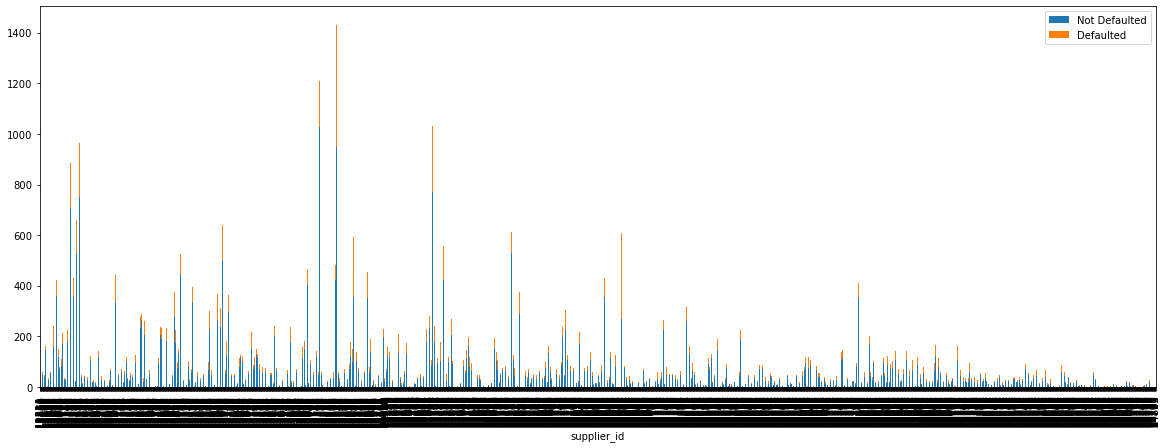

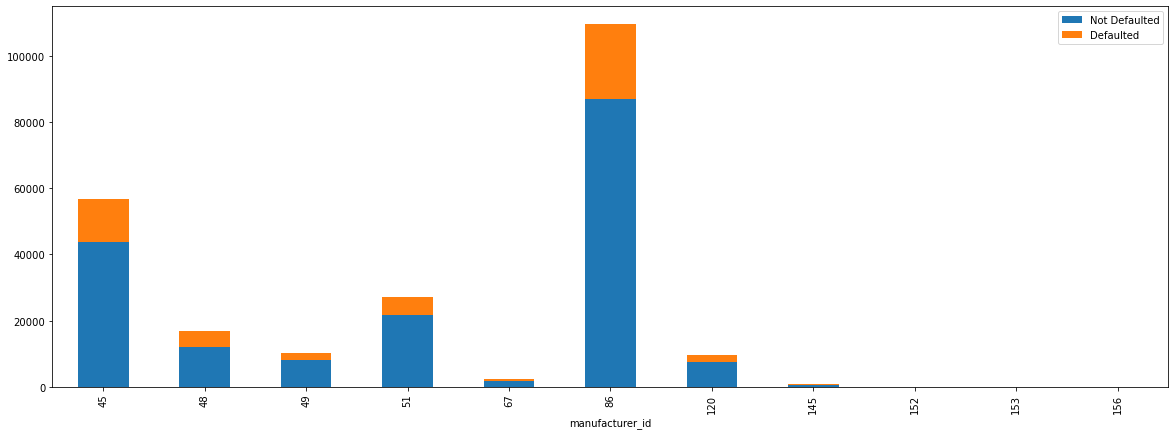

In [20]:
for i in ['branch_id','Current_pincode_ID','State_ID','supplier_id','manufacturer_id']:
    ct = pd.crosstab(loandata[i], loandata['loan_default'])
    ct.plot.bar(stacked = True,figsize=(20,7))
    plt.legend(labels=['Not Defaulted','Defaulted'])
    plt.show()

<AxesSubplot:>

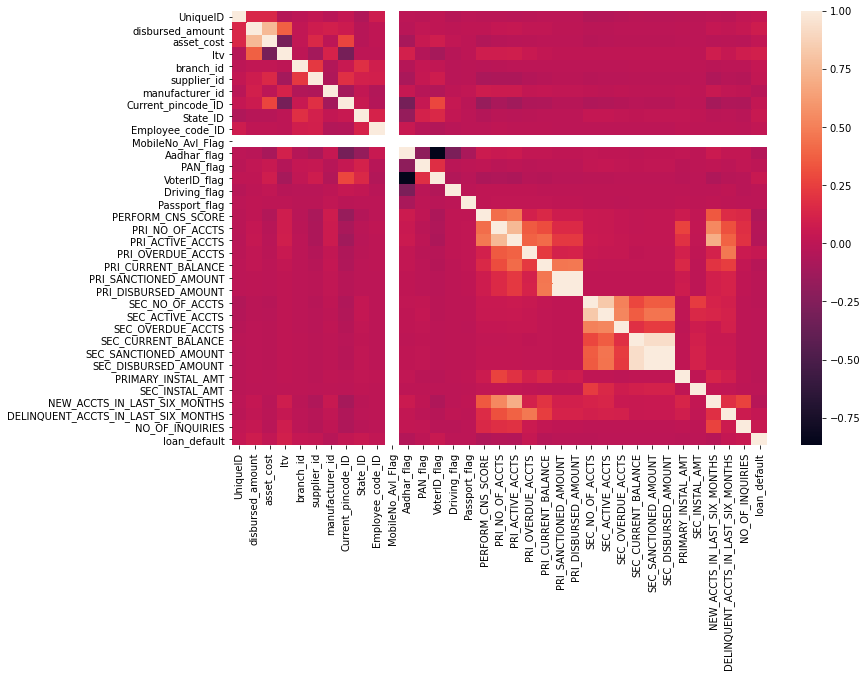

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(loandata.corr())

In [22]:
#What are the different employment types given in the data? Can a strategy be developed to fill in the missing values (if any)? 

In [23]:
loandata['Employment_Type'].value_counts()

Self employed    135296
Salaried          97858
Name: Employment_Type, dtype: int64

<AxesSubplot:>

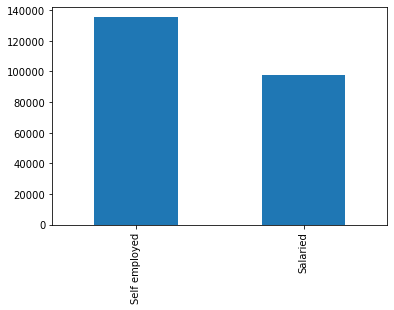

In [24]:
loandata['Employment_Type'].value_counts().plot(kind='bar')

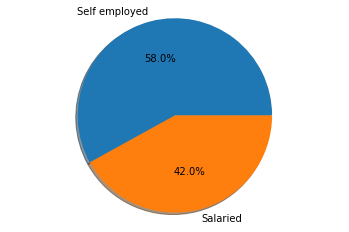

In [25]:
# pie chart
labels = ['Self employed', 'Salaried']
sizes = loandata['Employment_Type'].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [26]:
pct_loan_default = loandata['loan_default'].value_counts(normalize=True)*100
pct_loan_default

0    78.292888
1    21.707112
Name: loan_default, dtype: float64

In [27]:
print('% of salaried customer only who have defaulted:',
     np.round(loandata[(loandata['Employment_Type']=='Salaried') 
                       & (loandata['loan_default']==1)].shape[0]/(loandata[loandata['Employment_Type']=='Salaried'].shape[0])*100,2))

print('% of self employed customer only who have defaulted:',
     np.round(loandata[(loandata['Employment_Type']=='Self employed') 
                       & (loandata['loan_default']==1)].shape[0]/(loandata[loandata['Employment_Type']=='Self employed'].shape[0])*100,2))

% of salaried customer only who have defaulted: 20.35
% of self employed customer only who have defaulted: 22.69


Text(0.5, 1.0, 'Employment Bar Graph')

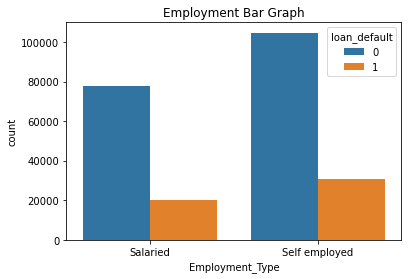

In [28]:
# Let's Bar Chart to draw the employment vs loan default chart
sns.countplot(x='Employment_Type',hue='loan_default',data=loandata)
plt.title('Employment Bar Graph')

In [29]:
emp_loan=pd.crosstab(loandata['Employment_Type'],loandata['loan_default'])
emp_loan

loan_default,0,1
Employment_Type,,
Salaried,77948,19910
Self employed,104595,30701


array([<AxesSubplot:ylabel='0'>, <AxesSubplot:ylabel='1'>], dtype=object)

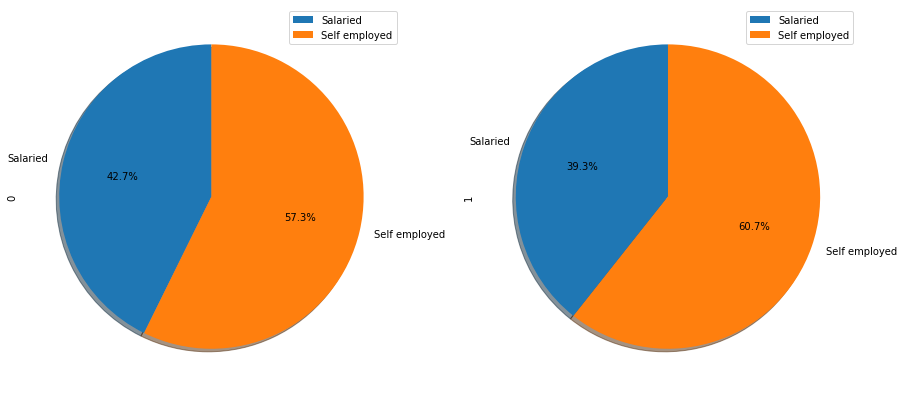

In [30]:
emp_loan.groupby(['Employment_Type']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

In [31]:
#Has age got something to do with defaulting? What is the distribution of age w.r.t. to defaulters and non-defaulters?

Text(0.5, 1.0, 'Age Histogram')

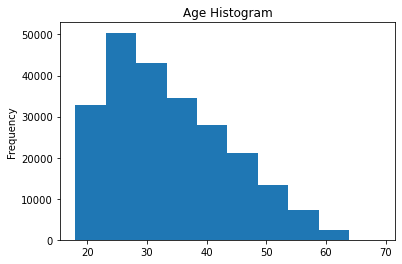

In [32]:
loandata['age'] = pd.DatetimeIndex(loandata['DisbursalDate']).year - pd.DatetimeIndex(loandata['Date_of_Birth']).year
loandata['age'].plot.hist()
plt.title('Age Histogram')

In [33]:
loandata.age.describe()

count    233154.000000
mean         34.100946
std           9.805992
min          18.000000
25%          26.000000
50%          32.000000
75%          41.000000
max          69.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Age BoxPlot')

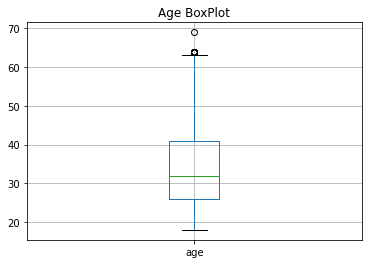

In [34]:
loandata.boxplot('age')
plt.title('Age BoxPlot')

Text(0.5, 1.0, 'Age BoxPlot')

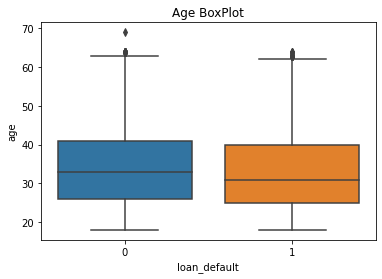

In [35]:
sns.boxplot(x='loan_default', y='age',data=loandata)
plt.title('Age BoxPlot')

In [36]:
#What type of ID was presented by most of the customers as proof?

In [37]:
print(loandata['Aadhar_flag'].value_counts())
print(loandata['PAN_flag'].value_counts())
print(loandata['VoterID_flag'].value_counts())
print(loandata['Driving_flag'].value_counts())
print(loandata['Passport_flag'].value_counts())

1    195924
0     37230
Name: Aadhar_flag, dtype: int64
0    215533
1     17621
Name: PAN_flag, dtype: int64
0    199360
1     33794
Name: VoterID_flag, dtype: int64
0    227735
1      5419
Name: Driving_flag, dtype: int64
0    232658
1       496
Name: Passport_flag, dtype: int64


In [38]:
print(loandata['Aadhar_flag'].value_counts(normalize=True)*100)
print(loandata['PAN_flag'].value_counts(normalize=True)*100)
print(loandata['VoterID_flag'].value_counts(normalize=True)*100)
print(loandata['Driving_flag'].value_counts(normalize=True)*100)
print(loandata['Passport_flag'].value_counts(normalize=True)*100)

1    84.032013
0    15.967987
Name: Aadhar_flag, dtype: float64
0    92.442334
1     7.557666
Name: PAN_flag, dtype: float64
0    85.505717
1    14.494283
Name: VoterID_flag, dtype: float64
0    97.675785
1     2.324215
Name: Driving_flag, dtype: float64
0    99.787265
1     0.212735
Name: Passport_flag, dtype: float64


In [39]:
#Study the credit bureau score distribution. How is the distribution for defaulters vs non-defaulters? Explore in detail.

In [40]:
loandata['PERFORM_CNS_SCORE'].describe()

count    233154.000000
mean        289.462994
std         338.374779
min           0.000000
25%           0.000000
50%           0.000000
75%         678.000000
max         890.000000
Name: PERFORM_CNS_SCORE, dtype: float64

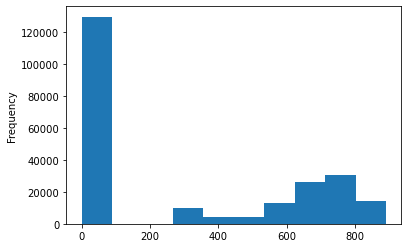

In [41]:
loandata['PERFORM_CNS_SCORE'].plot(kind='hist')
plt.show()

In [42]:
cibil_non_default = loandata[loandata['loan_default']==0]['PERFORM_CNS_SCORE']
cibil_default = loandata[loandata['loan_default']==1]['PERFORM_CNS_SCORE']

In [43]:
pd.DataFrame([cibil_non_default.describe(), cibil_default.describe()], index=['non_defaulters','defaulters'])

,count,mean,std,min,25%,50%,75%,max
non_defaulters,182543.0,299.784270,342.883794,0.0,0.0,15.0,690.0,890.0
defaulters,50611.0,252.236372,318.826242,0.0,0.0,0.0,610.0,879.0


/Users/priya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/priya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


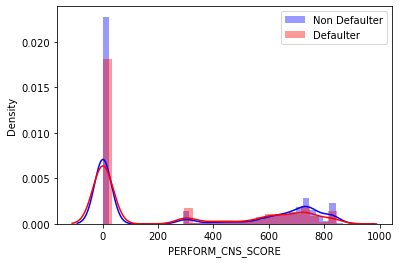

In [44]:
sns.distplot( a = cibil_non_default, color='blue', label = 'Non Defaulter')
sns.distplot(a = cibil_default, color='red', label = 'Defaulter')

plt.legend()
plt.show()

In [45]:
#Explore the primary and secondary account details. Is the information in some way related to loan default probability ?

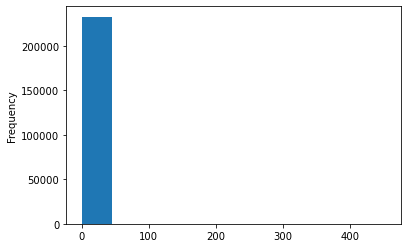

In [46]:
loandata['PRI_NO_OF_ACCTS'].plot(kind='hist')
plt.show()

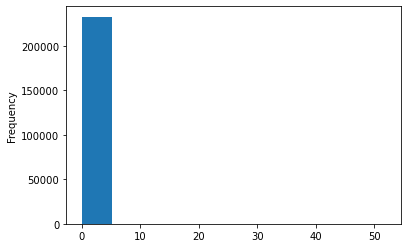

In [47]:
loandata['SEC_NO_OF_ACCTS'].plot(kind='hist')
plt.show()

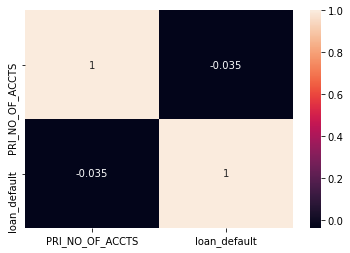

In [48]:
#Checking the correlation between primary and loan deafult vairable
sns.heatmap(loandata[['PRI_NO_OF_ACCTS','loan_default']].corr(),annot=True)
plt.show()

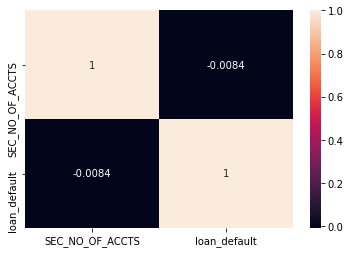

In [49]:
#Checking the correlation between seondary and loan deafult vairable
sns.heatmap(loandata[['SEC_NO_OF_ACCTS','loan_default']].corr(),annot=True)
plt.show()

In [50]:
pri_acct_non_default = loandata[loandata['loan_default']==0]['PRI_NO_OF_ACCTS']
pri_acct_default = loandata[loandata['loan_default']==1]['PRI_NO_OF_ACCTS']

In [51]:
pd.DataFrame([pri_acct_non_default.describe(), pri_acct_default.describe()], index=['non_defaulters','defaulters'])

,count,mean,std,min,25%,50%,75%,max
non_defaulters,182543.0,2.538038,5.261142,0.0,0.0,1.0,3.0,354.0
defaulters,50611.0,2.089328,5.040134,0.0,0.0,0.0,2.0,453.0


In [52]:
sec_acct_non_default = loandata[loandata['loan_default']==0]['SEC_NO_OF_ACCTS']
sec_acct_default = loandata[loandata['loan_default']==1]['SEC_NO_OF_ACCTS']

In [53]:
pd.DataFrame([sec_acct_non_default.describe(), sec_acct_default.describe()], index=['non_defaulters','defaulters'])

,count,mean,std,min,25%,50%,75%,max
non_defaulters,182543.0,0.061848,0.651657,0.0,0.0,0.0,0.0,52.0
defaulters,50611.0,0.049100,0.527358,0.0,0.0,0.0,0.0,38.0


In [54]:
#Is there a difference between the sanctioned and disbursed amount of primary & secondary loans. Study the difference by providing apt statistics and graphs.

In [55]:
pri_sanc_amt_counts = loandata['PRI_SANCTIONED_AMOUNT'].value_counts()
pri_sanc_amt_counts_percent = loandata['PRI_SANCTIONED_AMOUNT'].value_counts(normalize=True)*100

pd.DataFrame({'counts':pri_sanc_amt_counts,'percent_of_data':pri_sanc_amt_counts_percent})

,counts,percent_of_data
0,138096,59.229522
50000,1503,0.644638
30000,1450,0.621907
100000,974,0.417750
25000,946,0.405740
...,...,...
114802,1,0.000429
1122414,1,0.000429
1372970,1,0.000429
57430,1,0.000429


In [56]:
pri_disb_amt_counts = loandata['PRI_DISBURSED_AMOUNT'].value_counts()
pri_disb_amt_counts_percent = loandata['PRI_DISBURSED_AMOUNT'].value_counts(normalize=True)*100

pd.DataFrame({'counts':pri_disb_amt_counts,'percent_of_data':pri_disb_amt_counts_percent})

,counts,percent_of_data
0,138204,59.275843
50000,1398,0.599604
30000,1344,0.576443
100000,949,0.407027
40000,794,0.340547
...,...,...
417025,1,0.000429
898300,1,0.000429
1641300,1,0.000429
341228,1,0.000429


In [57]:
pri_acct_loan_amt =['PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT']

/Users/priya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/priya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


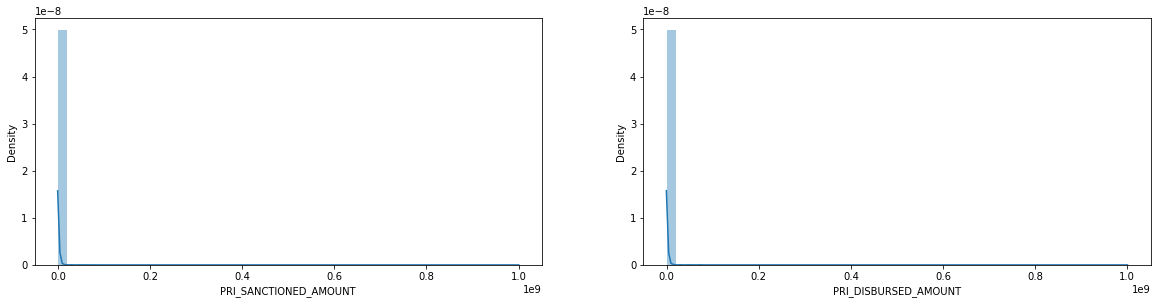

In [58]:
count = 1
plt.figure(figsize=(20,10))
for i in pri_acct_loan_amt:
    plt.subplot(2,2,count)
    sns.distplot(loandata[i])
    count += 1
plt.show()

In [59]:
sec_sanc_amt_counts = loandata['SEC_SANCTIONED_AMOUNT'].value_counts()
sec_sanc_amt_counts_percent = loandata['SEC_SANCTIONED_AMOUNT'].value_counts(normalize=True)*100

pd.DataFrame({'counts':sec_sanc_amt_counts,'percent_of_data':sec_sanc_amt_counts_percent})

,counts,percent_of_data
0,229418,98.397626
50000,83,0.035599
100000,61,0.026163
30000,44,0.018872
40000,39,0.016727
...,...,...
232096,1,0.000429
51912,1,0.000429
1682532,1,0.000429
224700,1,0.000429


In [60]:
sec_disb_amt_counts = loandata['SEC_DISBURSED_AMOUNT'].value_counts()
sec_disb_amt_counts_percent = loandata['SEC_DISBURSED_AMOUNT'].value_counts(normalize=True)*100

pd.DataFrame({'counts':sec_disb_amt_counts,'percent_of_data':sec_disb_amt_counts_percent})

,counts,percent_of_data
0,229450,98.411350
50000,59,0.025305
100000,47,0.020158
200000,36,0.015440
40000,31,0.013296
...,...,...
654829,1,0.000429
19931,1,0.000429
48581,1,0.000429
91390,1,0.000429


In [61]:
sec_acct_loan_amt =['SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT']

/Users/priya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/priya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


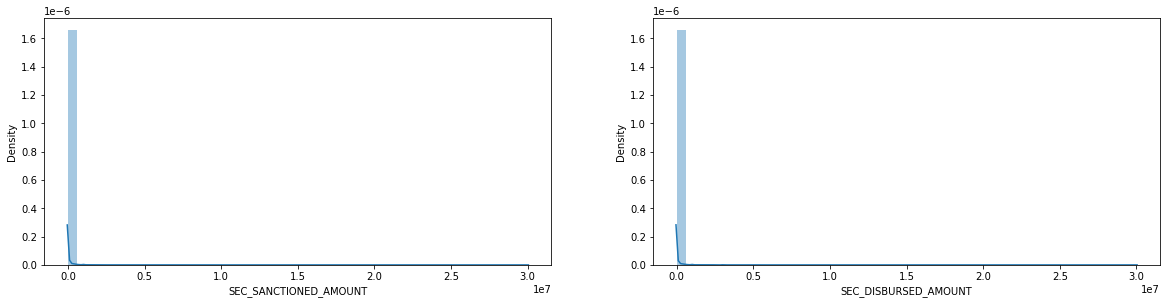

In [62]:
count=1
plt.figure(figsize=(20,10))
for i in sec_acct_loan_amt:
    plt.subplot(2,2,count)
    sns.distplot(loandata[i])
    count+=1
plt.show()

In [63]:
stats.ttest_ind(loandata.PRI_SANCTIONED_AMOUNT, loandata.PRI_DISBURSED_AMOUNT)

Ttest_indResult(statistic=0.06292770557575765, pvalue=0.9498240996726557)

In [64]:
stats.ttest_ind(loandata.SEC_SANCTIONED_AMOUNT, loandata.SEC_DISBURSED_AMOUNT)

Ttest_indResult(statistic=0.21643737250785414, pvalue=0.8286469322026462)

In [65]:
#Do customer who make higher no. of enquiries end up being higher risk candidates? 

In [66]:
enquiries_counts = loandata['NO_OF_INQUIRIES'].value_counts()
enquiries_counts_percent = loandata['NO_OF_INQUIRIES'].value_counts(normalize=True)*100

pd.DataFrame({'counts':enquiries_counts,'percent_of_data':enquiries_counts_percent})

,counts,percent_of_data
0,201961,86.621289
1,22285,9.558060
2,5409,2.319926
3,1767,0.757868
4,760,0.325965
5,343,0.147113
6,239,0.102507
7,135,0.057902
8,105,0.045035
9,44,0.018872


In [67]:
no_of_loan_inquiries = pd.crosstab(index=loandata['NO_OF_INQUIRIES'], columns=loandata['loan_default'])
no_of_loan_inquiries['pct_default'] = (no_of_loan_inquiries[1]/no_of_loan_inquiries.sum(axis=1))*100
no_of_loan_inquiries

loan_default,0,1,pct_default
NO_OF_INQUIRIES,,,
0,159404,42557,21.071890
1,16844,5441,24.415526
2,3918,1491,27.565169
3,1250,517,29.258630
4,526,234,30.789474
5,212,131,38.192420
6,148,91,38.075314
7,80,55,40.740741
8,61,44,41.904762


In [68]:
#Is credit history, i.e. new loans in last six months, loans defaulted in last six months, time since first loan, etc., a significant factor in estimating probability of loan defaulters?

In [69]:
def duration(dur):
    yrs = int(dur.split(' ')[0].replace('yrs',''))
    mon = int(dur.split(' ')[1].replace('mon',''))
    return yrs*12+mon

In [70]:
loandata['CREDIT_HISTORY_LENGTH'] = loandata['CREDIT_HISTORY_LENGTH'].apply(duration)

In [71]:
#verify to check the data type after function apply
loandata['CREDIT_HISTORY_LENGTH'].describe()

count    233154.000000
mean         16.252404
std          28.581255
min           0.000000
25%           0.000000
50%           0.000000
75%          24.000000
max         468.000000
Name: CREDIT_HISTORY_LENGTH, dtype: float64

In [72]:
credit_non_default = loandata[loandata['loan_default'] == 0]['CREDIT_HISTORY_LENGTH']
credit_default = loandata[loandata['loan_default'] == 1]['CREDIT_HISTORY_LENGTH']

In [73]:
pd.DataFrame([credit_non_default.describe(), credit_default.describe()], index=['non_defaulters','defaulters'])

,count,mean,std,min,25%,50%,75%,max
non_defaulters,182543.0,16.886377,29.342245,0.0,0.0,0.0,24.0,449.0
defaulters,50611.0,13.965798,25.519395,0.0,0.0,0.0,21.0,468.0


/Users/priya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


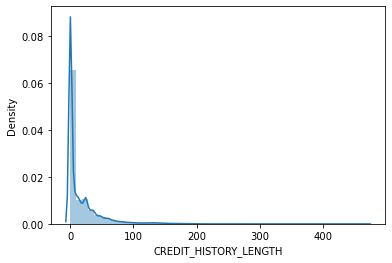

In [74]:
sns.distplot(loandata['CREDIT_HISTORY_LENGTH'])
plt.show()

In [75]:
new_acct_counts = loandata['NEW_ACCTS_IN_LAST_SIX_MONTHS'].value_counts()
new_acct_counts_percent = loandata['NEW_ACCTS_IN_LAST_SIX_MONTHS'].value_counts(normalize=True)*100

pd.DataFrame({'counts':new_acct_counts,'percent_of_data':new_acct_counts_percent})

,counts,percent_of_data
0,181494,77.842971
1,32099,13.767295
2,11015,4.724345
3,4458,1.912041
4,1957,0.839359
5,964,0.413461
6,480,0.205873
7,302,0.129528
8,147,0.063048
9,79,0.033883


In [76]:
delinquent_acct_counts = loandata['DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS'].value_counts()
delinquent_acct_counts_percent = loandata['DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS'].value_counts(normalize=True)*100

pd.DataFrame({'counts':delinquent_acct_counts,'delinquent_acct_counts':delinquent_acct_counts_percent})

,counts,delinquent_acct_counts
0,214959,92.196145
1,14941,6.408211
2,2470,1.059386
3,537,0.230320
4,138,0.059188
5,58,0.024876
6,20,0.008578
7,13,0.005576
8,7,0.003002
12,3,0.001287


### Perform Model Building and Predict

In [77]:
#Perform logistic regression modelling, predict the outcome for the test data, and validate the results using the confusion matrix.

In [78]:
#dropping unnecessary columns
# MobileNo_Avl_Flag - All values are 1
# Date_of_Birth , DisbursalDate -  Already used to compute age
# PERFORM_CNS_SCORE_DESCRIPTION - Score is already in dataset

loandata = loandata.drop(['MobileNo_Avl_Flag','Date_of_Birth','AVERAGE_ACCT_AGE','DisbursalDate','PERFORM_CNS_SCORE_DESCRIPTION'],axis=1)

In [79]:
loandata_new = pd.get_dummies(loandata,drop_first=True) 
print(loandata_new.columns)

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'State_ID',
       'Employee_code_ID', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
       'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
       'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH',
       'NO_OF_INQUIRIES', 'loan_default', 'age',
       'Employment_Type_Self employed'],
      dtype='object')


In [80]:
#train test split
X = loandata_new.drop('loan_default',axis=1)
y = loandata_new['loan_default']

In [81]:
X.shape

(233154, 36)

In [82]:
y.shape

(233154,)

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
sc = StandardScaler()

In [85]:
sc.fit(X)

StandardScaler()

In [86]:
Xt_z = pd.DataFrame(sc.transform(X), columns =X.columns)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xt_z, y, stratify=y, random_state=12)

In [88]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
fit=lr.fit(X_train, y_train)

In [89]:
y_pred= lr.predict(X_test)

In [90]:
pred_vs_actual_outcome = pd.crosstab(index = y_pred, columns = y_test)
pred_vs_actual_outcome

loan_default,0,1
row_0,,
0,45545,12584
1,91,69


In [91]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print(confusion_matrix(y_pred,y_test))

[[45545 12584]
 [   91    69]]


In [92]:
cm = confusion_matrix(y_pred,y_test)

In [93]:
#accuracy = (TN+TP)/(ALL)
accuracy_lr = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])*100
print('accuracy' ,accuracy_lr)

#precision = (TP)/(TP+FP)
precision_lr = (cm[1,1])/(cm[1,1]+cm[1,0])*100
print('precision' ,precision_lr)


#recall or sensitivity(TPR) for class1 = (TP)/(TP+FN)
recall_lr_class_1 = (cm[1,1])/(cm[1,1]+cm[0,1])*100
print('class1-recall' ,recall_lr_class_1)

#recall or specificity(TNR) for class 0 = (TN)/(TN+FP)
recall_lr_class_0 = (cm[0,0])/(cm[0,0]+cm[0,1])*100
print('class0-recall' ,recall_lr_class_0)

#F1_Score or Harmonic mean(HM) of precision and recall  = 2*precision*recall/(precision + recall)
F1_Score_lr = (2*precision_lr*recall_lr_class_1*recall_lr_class_0)/(precision_lr+recall_lr_class_1+recall_lr_class_0)
print('F1_Score' ,F1_Score_lr)

accuracy 78.25490229717443
precision 43.125
class1-recall 0.5453252193155773
class0-recall 78.35159730943248
F1_Score 30.201233269920934


In [94]:
loandata_output = loandata_new

In [95]:
loandata_output = pd.concat([loandata_output,importdata['PERFORM_CNS.SCORE.DESCRIPTION']], axis = 1)

In [96]:
loandata_output = loandata_output.drop(['asset_cost','ltv','Employee_code_ID','PRI_ACTIVE_ACCTS',
                                        'PRI_OVERDUE_ACCTS','PRI_CURRENT_BALANCE','SEC_ACTIVE_ACCTS','SEC_OVERDUE_ACCTS','SEC_CURRENT_BALANCE',
                                       'PRIMARY_INSTAL_AMT','SEC_INSTAL_AMT'],axis=1)

In [97]:
loandata_output.to_excel('/Users/priya/Pravat/Simplilearn Data Analytics/Class 5/project/project 2/loandata_output.xlsx', index = False)